<a href="https://colab.research.google.com/github/fernandohsantos/Algorithms-implemented-in-Python/blob/master/3_item_melhor_distribui%C3%A7%C3%A3o_para_as_diagonais_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# Desmontar o Drive (se já estiver montado)
try:
    drive.flush_and_unmount()
    print('Drive desmontado com sucesso.')
except ValueError:
    pass

# Montar o Drive novamente
drive.mount('/content/gdrive2')

!cp /content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/wgc.py /content
!cp /content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/degauss.py /content
!cp /content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/funcoes.py /content
!cp /content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/funcoes2.py /content
!cp /content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/funcoes3.py /content
!cp /content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/gaussianizacao.py /content
!cp /content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/tenda2d.py /content

Drive not mounted, so nothing to flush and unmount.
Drive desmontado com sucesso.
Mounted at /content/gdrive2
cp: cannot stat '/content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/funcoes/funcoes3.py': No such file or directory


In [ ]:
#!pip install pyts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Recorrência

### Definição da matriz de recorrência
\begin{equation}
    R_{i,j}(\varepsilon) = (\varepsilon - \|x_i - x_j\|) \quad \text{para } i, j = 1, \ldots, N
\end{equation}

In [ ]:
def mapa_recorrencia(sinal, limiar):
    """
    Gera mapa de recorrência
    """
    # Comprimento do sinal e dimensão da matriz
    N = len(sinal)
    R = np.zeros((N, N))

    # Cálculo das distâncias
    for i in range(N):
        for j in range(N):
            R[i, j] = np.abs(sinal[i] - sinal[j])

    # Compara as distâncias com o limiar e gera uma matriz binária
    R = np.where(R <= limiar, 1, 0)

    return R

### Sinal constante

In [ ]:
n = 1000
limiar = 0.1

# sinal constante = 1
sinal_ex1 = np.ones(n)

R_sinal_constante = mapa_recorrencia(sinal = sinal_ex1, limiar = limiar)

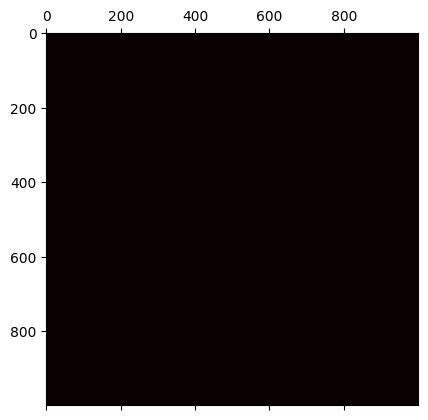

In [ ]:
plt.matshow(R_sinal_constante, cmap = 'hot')
plt.show()

### Sinal periódico

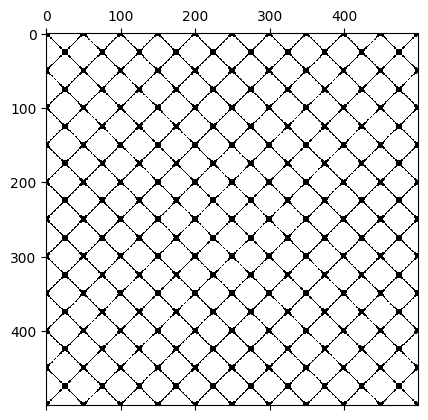

In [ ]:
n = 500
limiar = 0.1

# sinal periódico
x = np.linspace(0,10*(2*np.pi),n)
sinal_ex2 = np.cos(x)

R_sinal_periodico = mapa_recorrencia(sinal = sinal_ex2, limiar = limiar)

plt.matshow(R_sinal_periodico, cmap = 'binary')
plt.show()

### Sinal aleatório (WGN)

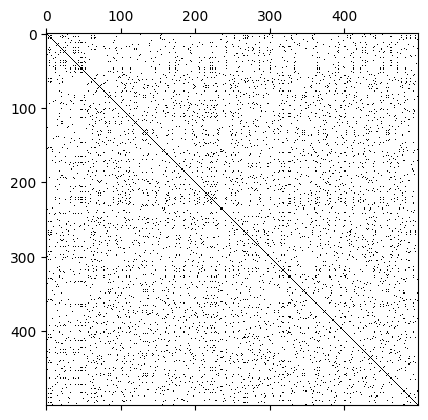

In [ ]:
n = 500
limiar = 0.08

# sinal aleatório
sinal_ex3 = np.random.randn(n)

R_sinal_wgn = mapa_recorrencia(sinal = sinal_ex3, limiar = limiar)

plt.matshow(R_sinal_wgn, cmap = 'binary')
plt.show()

### Sinal WGC

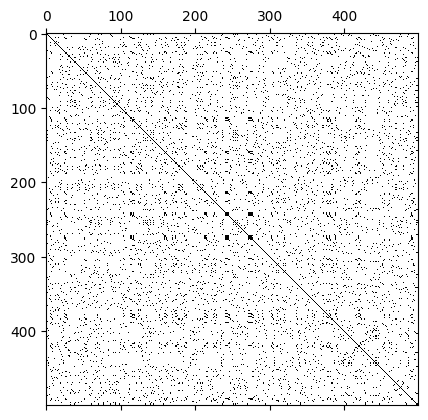

In [ ]:
from funcoes2 import wgcnpontos
n =  500
limiar = 0.1

# sinal caótico
sinal_wgc = wgcnpontos(n)

R_sinal_wgc = mapa_recorrencia(sinal = sinal_wgc, limiar = limiar)

plt.matshow(R_sinal_wgc, cmap = 'binary') # cmap hot or binary?
plt.show()

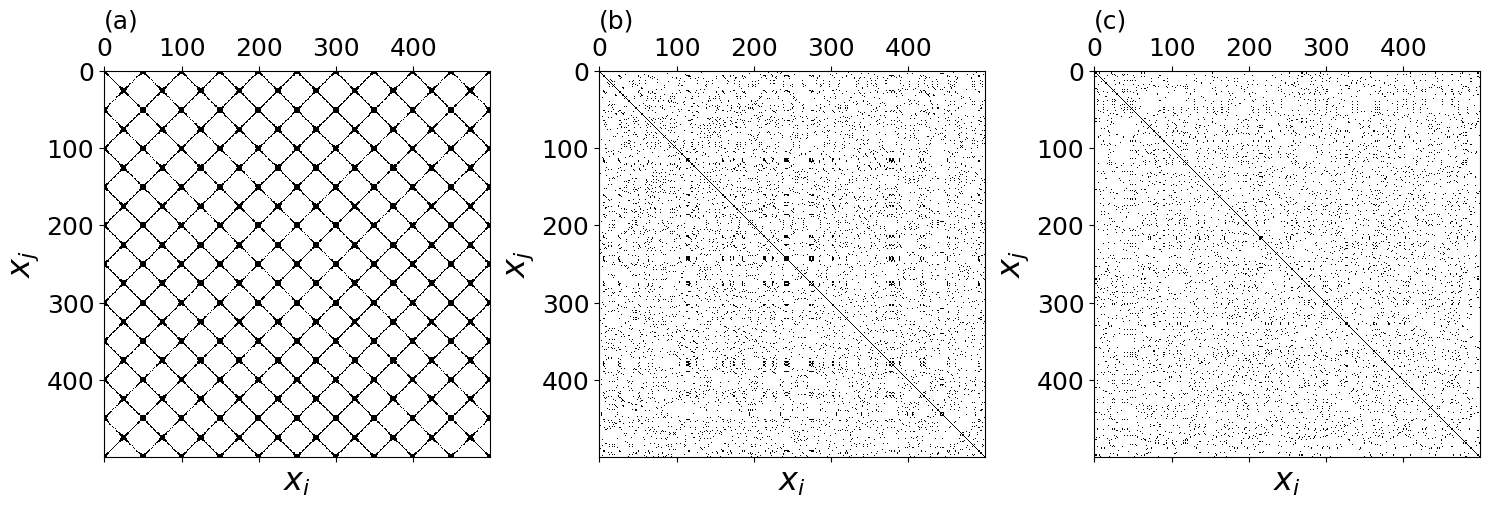

In [ ]:
import matplotlib.pyplot as plt
import os

# Obter o diretório atual de trabalho
current_directory = os.getcwd()

# Definir o nome do arquivo EPS
filename = "grafico_recorrencia_artigo.jpeg"

# Caminho completo para salvar a imagem
file_path = os.path.join(current_directory, filename)

# Defina o tamanho da figura
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Tamanho da fonte
font_size = 18
fonte_eixo = 23

# Primeiro subplot
axs[0].matshow(R_sinal_periodico, cmap='binary')
axs[0].set_xlabel('$x_i$', fontsize=fonte_eixo)
axs[0].set_ylabel('$x_j$', fontsize=fonte_eixo)
#axs[0].set_title('(a) sinal periódico', fontsize=font_size)
axs[0].set_title('(a)', fontsize=font_size, loc='left')

# Segundo subplot
axs[1].matshow(R_sinal_wgc, cmap='binary')
axs[1].set_xlabel('$x_i$', fontsize=fonte_eixo)
axs[1].set_ylabel('$x_j$', fontsize=fonte_eixo)
#axs[1].set_title('(b) sinal gerado pelo WGC', fontsize=font_size)
axs[1].set_title('(b)', fontsize=font_size, loc='left')


# Terceiro subplot
axs[2].matshow(R_sinal_wgn, cmap='binary')
axs[2].set_xlabel('$x_i$', fontsize=fonte_eixo)
axs[2].set_ylabel('$x_j$', fontsize=fonte_eixo)
#axs[2].set_title('(c) sinal gerado pelo WGN', fontsize=font_size)
axs[2].set_title('(c)', fontsize=font_size, loc='left')

# Ajustar o tamanho da fonte nos números dos eixos
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Ajuste o layout para evitar a sobreposição de rótulos
plt.tight_layout()

# Salvar a figura como EPS com alta resolução
plt.savefig(file_path, format='jpeg', dpi=300)

# Exiba os subplots
plt.show()

# Cálculo das diagonais

In [ ]:
def armazena_diagonal(matriz):
  # Armazena as diagonais que estão dentro de uma matriz
  dimensao = len(matriz)-1
  M_aux = np.zeros((dimensao,dimensao))

  for j in range(dimensao):

    for i in range(dimensao-j):
      M_aux[j,i] = matriz[i][i+1+j]

  return M_aux

In [ ]:
# A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
# A

A = np.array([[1,1,1,1,1,1],
              [1,1,1,1,1,1],
              [1,1,1,1,1,1],
              [1,1,1,1,1,1],
              [1,1,1,1,1,1],
              [1,1,1,1,1,1]])
A

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

In [ ]:
B = armazena_diagonal(A)
B

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
import numpy as np

def mede_comprimento(matriz, L_min):
#Lmin : Comprimento mínimo para ser considerado uma diagonal
    info_por_linha = []

    for linha in matriz:
        comprimentos = []
        contagem_atual = 0

        for elemento in linha:
            if elemento != 0:
                contagem_atual += 1
            else:
                if contagem_atual >= L_min:
                    comprimentos.append(contagem_atual)
                contagem_atual = 0

        if contagem_atual >= L_min:
            comprimentos.append(contagem_atual)

        info_por_linha.append(comprimentos)

    return info_por_linha

In [ ]:
# Sua matriz
# M = np.array([[0, 1, 2, 0, 3, 4, 5, 0],
#               [0, 0, 3, 0, 4, 0, 0, 0],
#               [5, 0, 6, 7, 0, 0, 0, 8]])

# M = np.array([
#     [1, 0, 1, 0, 1],
#     [0, 1, 0, 1, 0],
#     [1, 0, 1, 0, 1],
#     [0, 1, 0, 1, 0],
#     [1, 0, 1, 0, 1]])

# Obtenha as informações sobre as sequências de cada linha com comprimento mínimo de 2
info = mede_comprimento(B, L_min=2)

for i, comprimentos in enumerate(info, start=1):
    if comprimentos:
        print(f'Na linha {i}, as sequências têm os seguintes comprimentos: {comprimentos}')
    else:
        print(f'Na linha {i}, não há sequências.')


Na linha 1, as sequências têm os seguintes comprimentos: [5]
Na linha 2, as sequências têm os seguintes comprimentos: [4]
Na linha 3, as sequências têm os seguintes comprimentos: [3]
Na linha 4, as sequências têm os seguintes comprimentos: [2]
Na linha 5, não há sequências.


In [ ]:
C = mede_comprimento(B, L_min=2)
C

[[5], [4], [3], [2], []]

In [ ]:
def lista_para_vetor(lista_de_listas):
    """
    Converte uma lista de listas em um vetor achatado.

    Parametros:
    - lista_de_listas: Lista contendo listas internas.

    Retorna:
    - vetor: Lista achatada contendo todos os elementos.
    """
    vetor_com_elementos = [elemento for sublista in lista_de_listas for elemento in sublista]
    return vetor_com_elementos

In [ ]:
lista_para_vetor(C)

[5, 4, 3, 2]

In [ ]:
print('A soma dos comprimentos das diagonais é',sum(lista_para_vetor(C)))

A soma dos comprimentos das diagonais é 14


In [ ]:
print('A média dos comprimentos das diagonais é',np.mean(lista_para_vetor(C)))

A média dos comprimentos das diagonais é 3.5


## Cálculo para o sinal constante

In [ ]:
print('A soma dos elementos é:',sum(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_constante),1))))
print('O comprimento médio das diagonais é:',np.mean(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_constante),1))))

A soma dos elementos é: 499500
O comprimento médio das diagonais é: 500.0


In [ ]:
print('Fórmula para obter a soma das diagonais [(N+1)*(N-2)]/2',((1000+1)*(1000-2))/2)

Fórmula para obter a soma das diagonais [(N+1)*(N-2)]/2 499499.0


In [ ]:
print('A soma dos elementos é WGN:',sum(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_wgn),2))))
print('A soma dos elementos é WGC:',sum(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_wgc),2))))

A soma dos elementos é WGN: 427
A soma dos elementos é WGC: 1214


In [ ]:
print('O comprimento médio das diagonais é:',np.mean(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_wgn),1))))
print('O comprimento médio das diagonais é:',np.mean(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_wgc),1))))
print('O comprimento médio das diagonais é:',np.mean(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_periodico),1))))
print('O comprimento médio das diagonais é:',np.mean(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_constante),1))))

O comprimento médio das diagonais é: 1.041039156626506
O comprimento médio das diagonais é: 1.112657606025872
O comprimento médio das diagonais é: 2.903533492304357
O comprimento médio das diagonais é: 500.0


Text(0, 0.5, 'Frequência')

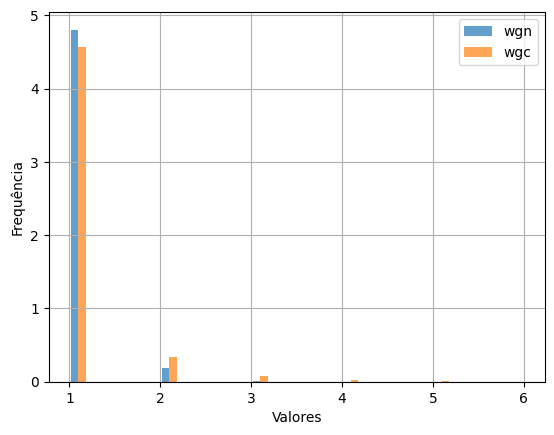

In [ ]:
dados_wgn = lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_wgn), 1))
dados_wgc = lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_wgc), 1))

# Crie os histogramas
plt.hist([dados_wgn, dados_wgc], alpha=0.7, label=['wgn','wgc'],stacked=False, bins = 25, density=True)
#plt.hist(dados_wgc, color='blue', alpha=0.5, label='wgc',bins = 25)

# Adicione legendas e rótulos
plt.legend()
plt.grid()
plt.xlabel('Valores')
plt.ylabel('Frequência')

In [ ]:
print('A soma dos elementos é :',sum(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_periodico),2))))
print('O comprimento médio das diagonais é:',np.mean(lista_para_vetor(mede_comprimento(armazena_diagonal(R_sinal_periodico),1))))

A soma dos elementos é : 10563
O comprimento médio das diagonais é: 2.903533492304357


In [ ]:
qtde_sinais = 5 * 10 ** 2
tamanho_sinal = 10 ** 3

import random
from random import sample
sinais_wgn = []
sinais_wgn_aux = []
classificao_real = []

######################################################### WGN
for Nsinal in range(qtde_sinais):
    # Gera uma sequência de números aleatórios
    sinal_wgn = np.random.randn(tamanho_sinal)

    # Embaralha a sequência
    random.shuffle(sinal_wgn)

    # Armazena o sinal na lista
    sinais_wgn.append(sinal_wgn)

# Converte a lista em uma matriz
sinais_wgn2 = np.array(sinais_wgn)

######################################################### WGC
from funcoes2 import wgcnpontos

sinal = np.zeros((tamanho_sinal))

sinais = []
classificao_real = []

for Nsinal in range(0,qtde_sinais):
  sinais.append(wgcnpontos(tamanho_sinal))

sinais_wgc = np.array(sinais)
np.shape(sinais_wgc)


(500, 1000)

In [ ]:
# limiar = 0.1

# Recorrencia_sinais_wgc = np.zeros((qtde_sinais))
# Recorrencia_sinais_wgn = np.zeros((qtde_sinais))

# for Nsinal in range(0,qtde_sinais):
#   Recorrencia_sinais_wgc[Nsinal] = sum(lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgc[Nsinal,:], limiar = limiar)),2)))

# for Nsinal in range(0,qtde_sinais):
#   Recorrencia_sinais_wgn[Nsinal] = sum(lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgn2[Nsinal,:], limiar = limiar)),2)))

# # Crie os histogramas
# plt.hist([Recorrencia_sinais_wgn, Recorrencia_sinais_wgc], alpha=0.7, label=['wgn','wgc'],stacked=False, bins = 25, density=True)

# plt.legend()
# plt.grid()
# plt.xlabel('Valores')
# plt.ylabel('Frequência')

Se eu deixo o limiar alto,em 1,5, as distribuições se sobrepoe. Se deixo baixo, em 0.01, elas se sobrepoe mais ainda

In [ ]:
((1000)**2-1000-2)/2

499499.0

In [ ]:
A = lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgc[Nsinal,:], limiar = limiar)),2))
np.shape(A)

(2039,)

In [ ]:
B = lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgn2[Nsinal,:], limiar = limiar)),2))
np.shape(B)

(1592,)

In [ ]:
C = lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinal_ex1, limiar = limiar)),2))
np.shape(C)

(998,)

# Cálculo da diagonal média

O valor do comprimento médio das diagonais é
\begin{equation}
L = \frac{\sum_{l=l_{min}}^N l \cdot P(l)}{\sum_{l=l_{min}}^N P(l)}
\end{equation}
Aplicando ao sinal constante
\begin{equation}
\frac{1 \cdot 2 + 1 \cdot 3 + ... + 1 \cdot (N-1)}{N-2} = \frac{[(N-1)+2]\cdot (N-2)}{2 \cdot{(N-2)}} = \frac{N+1}{2}
\end{equation}
desse modo \frac{N+1}{2} é o comprimento médio máximo que uma diagonal poderá ter

In [ ]:
import numpy as np

def media_ponderada2(elementos):
    # Obter os elementos únicos e as contagens
    elementos_unicos, contagens = np.unique(elementos, return_counts=True)

    # Calcular a média ponderada
    soma_pesos = np.sum(elementos_unicos * contagens)
    soma_frequencias = np.sum(contagens)

    # Verificar se a soma das frequências não é zero
    if soma_frequencias == 0:
        raise ValueError("A soma das frequências não pode ser zero.")

    media_ponderada = soma_pesos / soma_frequencias
    return media_ponderada

In [ ]:
media_ponderada2(lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinal_ex1, limiar = limiar)),2)))

500.5

In [ ]:
### 1000 Pontos
limiar = 0.08

Recorrencia_sinais_wgc = np.zeros((qtde_sinais))
Recorrencia_sinais_wgn = np.zeros((qtde_sinais))

for Nsinal in range(0,qtde_sinais):
  Recorrencia_sinais_wgc[Nsinal] = media_ponderada2(lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgc[Nsinal,:], limiar = limiar)),2)))

for Nsinal in range(0,qtde_sinais):
  Recorrencia_sinais_wgn[Nsinal] = media_ponderada2(lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgn2[Nsinal,:], limiar = limiar)),2)))

# Crie os histogramas
plt.hist([Recorrencia_sinais_wgn, Recorrencia_sinais_wgc], alpha=0.7, label=['wgn','wgc'],stacked=False, bins = 25, density=True)

plt.legend()
plt.grid()
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Salvar a figura como EPS com alta resolução
plt.savefig('distribuicao_wgcwgn.eps', format='eps', dpi=300)

Text(0, 0.5, 'Frequência')

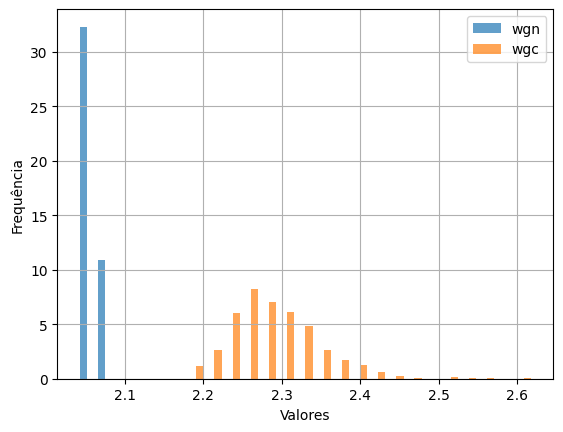

In [ ]:
### 100 Pontos
limiar = 0.1

Recorrencia_sinais_wgc = np.zeros((qtde_sinais))
Recorrencia_sinais_wgn = np.zeros((qtde_sinais))

for Nsinal in range(0,qtde_sinais):
  Recorrencia_sinais_wgc[Nsinal] = media_ponderada2(lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgc[Nsinal,:], limiar = limiar)),2)))

for Nsinal in range(0,qtde_sinais):
  Recorrencia_sinais_wgn[Nsinal] = media_ponderada2(lista_para_vetor(mede_comprimento(armazena_diagonal(mapa_recorrencia(sinal = sinais_wgn2[Nsinal,:], limiar = limiar)),2)))

# Crie os histogramas
plt.hist([Recorrencia_sinais_wgn, Recorrencia_sinais_wgc], alpha=0.7, label=['wgn','wgc'],stacked=False, bins = 25, density=True)

plt.legend()
plt.grid()
plt.xlabel('Valores')
plt.ylabel('Frequência')

In [ ]:
# import pickle

# # Salva as variáveis em um arquivo
# with open('/content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/1.qualificacao/nome_arquivo.pkl', 'wb') as f:
#   pickle.dump([Recorrencia_sinais_wgc, Recorrencia_sinais_wgn], f)

# print("Variáveis salvas com sucesso!")

Variáveis salvas com sucesso!


In [ ]:
import pickle
import numpy as np

# Carrega as variáveis do arquivo
with open('/content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/1.qualificacao/diagonais_graficos_recorrencia_1000.pkl', 'rb') as f:
  Recorrencia_sinais_wgc, Recorrencia_sinais_wgn = pickle.load(f)

# Recorrencia_sinais_wgc e Recorrencia_sinais_wgn
print(np.shape(Recorrencia_sinais_wgc))
print(np.shape(Recorrencia_sinais_wgn))

(500,)
(500,)


# Escolha do limiar ótimo

In [ ]:
import pickle
import numpy as np

# Carrega as variáveis do arquivo
with open('/content/gdrive2/MyDrive/1.Doutorado/Doutorado/WhiteGaussianChaos/1.qualificacao/diagonais_graficos_recorrencia_1000.pkl', 'rb') as f:
  Recorrencia_sinais_wgc, Recorrencia_sinais_wgn = pickle.load(f)

# Recorrencia_sinais_wgc e Recorrencia_sinais_wgn
print(np.shape(Recorrencia_sinais_wgc))
print(np.shape(Recorrencia_sinais_wgn))

(500,)
(500,)


Text(0, 0.5, 'Frequência')

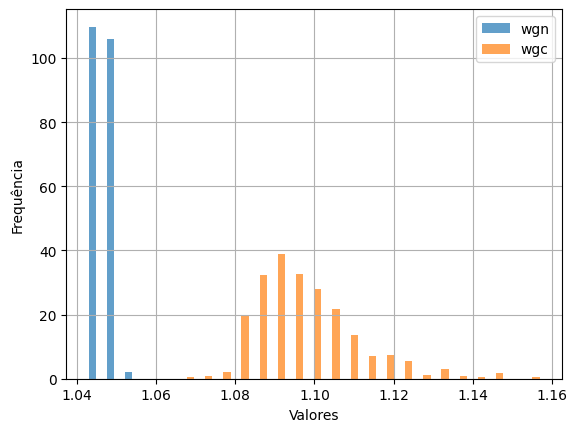

In [ ]:
# Crie os histogramas
import matplotlib.pyplot as plt
plt.hist([Recorrencia_sinais_wgn, Recorrencia_sinais_wgc], alpha=0.7, label=['wgn','wgc'],stacked=False, bins = 25, density=True)

plt.legend()
plt.grid()
plt.xlabel('Valores')
plt.ylabel('Frequência')

In [ ]:
# prompt: Como o ks_statistic_wgn está sendo calculado?

# ks_statistic_wgn é calculado usando a função kstest da biblioteca scipy.stats.
# A função kstest testa se uma amostra de dados é proveniente de uma distribuição específica.
# Neste caso, a função é usada para testar se os dados em Recorrencia_sinais_wgn são proveniente de uma das distribuições definidas em distributions, e a função retorna o valor de ks_statistic.
# ks_statistic_wgn representa a estatística de Kolmogorov-Smirnov para a melhor distribuição encontrada para Recorrencia_sinais_wgn.
#
# Em resumo, o código calcula a estatística KS para cada distribuição, e então seleciona a distribuição que possui a menor estatística KS.

In [ ]:
from scipy.stats import norm, expon, gamma, lognorm, weibull_min, kstest,chi2

def best_fitting_distribution(data):
    """
    Determina a melhor distribuição que se ajusta aos dados fornecidos.

    Args:
        data: Um array NumPy de dados.

    Returns:
        Uma tupla contendo o nome da melhor distribuição e a estatística KS.
    """
    distributions = {
        'normal': norm,
        'exponential': expon,
        'gamma': gamma,
        'lognormal': lognorm,
        'weibull': weibull_min,
        'chi2':chi2
    }

    best_distribution = None
    best_ks_statistic = float('inf')

    for distribution_name, distribution in distributions.items():
        # Ajusta os dados à distribuição e calcula a estatística KS
        params = distribution.fit(data)
        ks_statistic, p_value = kstest(data, distribution.cdf, args=params)

        # Exibe o nome da distribuição e o valor da estatística KS
        print(f'Distribuição: {distribution_name}, KS Statistic: {ks_statistic}, p-value: {p_value}')

        if ks_statistic < best_ks_statistic:
            best_ks_statistic = ks_statistic
            best_distribution = distribution_name

    return best_distribution, best_ks_statistic


# Exemplo de uso:
best_distribution_wgn, ks_statistic_wgn = best_fitting_distribution(Recorrencia_sinais_wgn)
best_distribution_wgc, ks_statistic_wgc = best_fitting_distribution(Recorrencia_sinais_wgc)

print(f"Melhor distribuição para Recorrencia_sinais_wgn: {best_distribution_wgn}, KS estatística: {ks_statistic_wgn}")
print(f"Melhor distribuição para Recorrencia_sinais_wgc: {best_distribution_wgc}, KS estatística: {ks_statistic_wgc}")
print(f"Melhor distribuição para Recorrencia_sinais_wgn: {best_distribution_wgn}, KS estatística: {ks_statistic_wgn}")
print(f"Melhor distribuição para Recorrencia_sinais_wgc: {best_distribution_wgc}, KS estatística: {ks_statistic_wgc}")


Distribuição: normal, KS Statistic: 0.02680365423545128, p-value: 0.8554315920103504
Distribuição: exponential, KS Statistic: 0.29413486014917933, p-value: 7.945969793767531e-39
Distribuição: gamma, KS Statistic: 0.024983048475648584, p-value: 0.9060060022632915
Distribuição: lognormal, KS Statistic: 0.02484403312935224, p-value: 0.9094375896361293
Distribuição: weibull, KS Statistic: 0.01819949124539688, p-value: 0.9954578162651091
Distribuição: chi2, KS Statistic: 0.5804882959570659, p-value: 1.9085431158708512e-160
Distribuição: normal, KS Statistic: 0.0888286219750466, p-value: 0.0006981322085173195
Distribuição: exponential, KS Statistic: 0.31633146342482876, p-value: 5.588051167139504e-45
Distribuição: gamma, KS Statistic: 0.46584929275263365, p-value: 6.1312812658229e-100
Distribuição: lognormal, KS Statistic: 0.030298370254080054, p-value: 0.7364111101746512
Distribuição: weibull, KS Statistic: 0.07154608616126157, p-value: 0.011367282353330345
Distribuição: chi2, KS Statistic:

In [ ]:
# WGN - Ajustando a distribuição de Weibull
shape_wgn, loc_wgn, scale_wgn = weibull_min.fit(Recorrencia_sinais_wgn)
# Gera um vetor x com os valores para os quais calcular a PDF
x_wgn = np.linspace(min(Recorrencia_sinais_wgn)-0.005, max(Recorrencia_sinais_wgc)+0.005, 1000)
f1 = weibull_min.pdf(x_wgn, shape_wgn, loc=loc_wgn, scale=scale_wgn)

# WGC - Ajustando a distribuição lognormal
shape_wgc, loc_wgc, scale_wgc = lognorm.fit(Recorrencia_sinais_wgc)
# Gera um vetor x com os valores para os quais calcular a PDF da lognormal
x_wgc = np.linspace(min(Recorrencia_sinais_wgn)-0.005, max(Recorrencia_sinais_wgc)+0.005, 1000)
f2 = lognorm.pdf(x_wgc, shape_wgc, loc=loc_wgc, scale=scale_wgc)

Text(0, 0.5, 'Frequência')

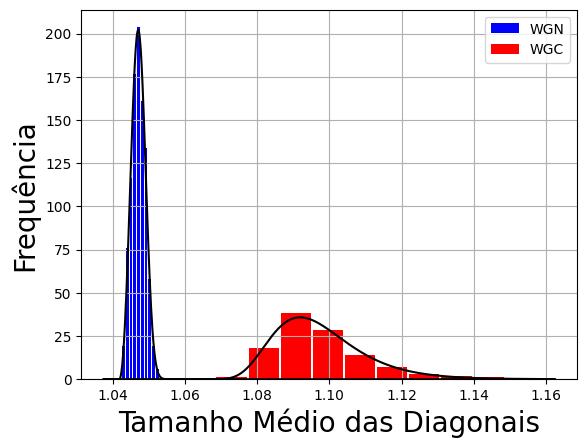

In [ ]:
import numpy as np
from scipy.stats import weibull_min, lognorm
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Valores a serem calculados
shape_wgn, loc_wgn, scale_wgn = weibull_min.fit(Recorrencia_sinais_wgn)
shape_wgc, loc_wgc, scale_wgc = lognorm.fit(Recorrencia_sinais_wgc)

# Faixa onde sabemos que está a interseção
x_range = np.linspace(1.04, 1.08, 100)

# Definir a função para encontrar a interseção
def find_intersection(x):
    pdf_weibull = weibull_min.pdf(x, shape_wgn, loc=loc_wgn, scale=scale_wgn)
    pdf_lognorm = lognorm.pdf(x, shape_wgc, loc=loc_wgc, scale=scale_wgc)
    return pdf_weibull - pdf_lognorm

# Estimativa inicial para a interseção
x_guess = 1.06

# Encontrar o ponto de interseção
x_intersection = fsolve(find_intersection, x_guess)

# Valor da PDF no ponto de interseção
pdf_intersection = weibull_min.pdf(x_intersection, shape_wgn, loc=loc_wgn, scale=scale_wgn)

x_intersection[0], pdf_intersection[0]

(1.0616062544644764, 2.321688451826621e-14)

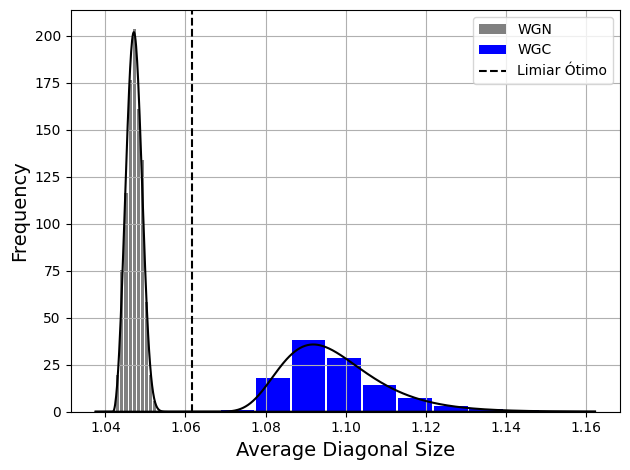

In [ ]:
# plot da distribuições e do histograma para Recorrencia_sinais_wgn

# Obter o diretório atual de trabalho
current_directory = os.getcwd()

# Definir o nome do arquivo EPS
filename = "grafico_limiar_otimo.jpeg"

plt.plot(x_wgn, f1, color='black')  # Usando x_wgn para f1
plt.hist(Recorrencia_sinais_wgn, color='grey', rwidth=0.75, label='WGN', density=True)

plt.plot(x_wgc, f2, color='black')  # Usando x_wgc para f2
plt.hist(Recorrencia_sinais_wgc, color='blue', rwidth=0.95, label='WGC', density=True)

plt.axvline(x_intersection[0], linestyle='--', color='black', label='Limiar Ótimo')

plt.grid()
plt.legend()
plt.xlabel('Average Diagonal Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Ajuste o layout para evitar a sobreposição de rótulos
plt.tight_layout()

# Salvar a figura como EPS com alta resolução
plt.savefig(filename, format='jpeg', dpi=300)

# Exiba os subplots
plt.show()